<a href="https://colab.research.google.com/github/alikazimsandal/Telco-Churn-Analizi/blob/master/Telco_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading our database**





In [0]:
# Connecting to google drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Libraries we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files

warnings.filterwarnings('ignore')


***Opening our database***

In [0]:
# Going to the file location.

%cd "/content/drive/My Drive/BOOTCAMP - PYTHON"

/content/drive/My Drive/BOOTCAMP - PYTHON


In [0]:
# Checking if our data is in this file location.
!ls

'1. Hafta Python.ipynb'
'2. Hafta Python.ipynb adlı dosyanın kopyası'
'3. Hafta Python.ipynb'
'4. Hafta Python.ipynb'
'5. Hafta Python.ipynb'
'6. Hafta Python.ipynb'
'6. Hafta Python.ipynb adlı dosyanın kopyası'
'7. Hafta Python.ipynb'
 Bitki_Sınıflandırma.ipynb
'Churn Ornekler'
'Derin Öğrenme ile Rakam Tanıma.ipynb'
 fig1.png
 fig2.png
 fig3.png
 fig.png
'Matplotlib 16 06 2019.ipynb'
 Ödevler.ipynb
 scatter.png
'Telco Churn Analysis.ipynb'
 Telco-Customer-Churn.csv


In [0]:
data = pd.read_csv("Telco-Customer-Churn.csv") 

**Data Overview**

In [0]:
# First 5 Rows

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Rows and columns

print ("Rows: ",data.shape[0])
print ("Columns: ",data.shape[1])

Rows:  7043
Columns:  21


In [0]:
# Column Names
print(data.columns.tolist())

# Unique Data
print("\n Unique Data: " ,data.nunique())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Unique Data:  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [0]:
# Exploring data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
# Converting TotalCharges column from object to numeric value

data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")
data.isnull().sum() # 11 rows of TotalCharges column are empty.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
# Deleting those 11 empty rows, since they are only 0.15% of the our dataset

data=data.dropna()

# Checking if any null data remains

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
# We can also drop Customer ID column because it doesn't affect the churn.

data=data.drop(columns='customerID')

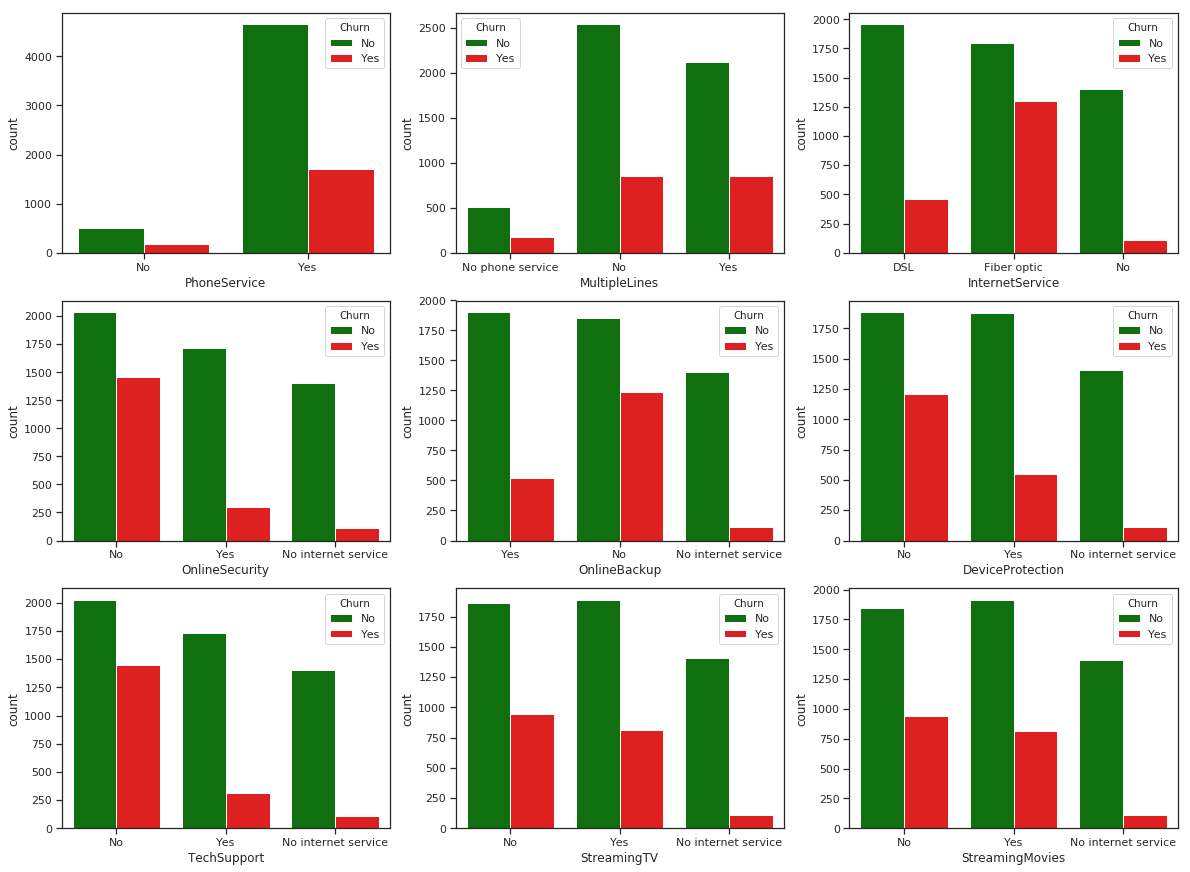

In [0]:

# Services
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
sns.countplot(x = "PhoneService", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][0])
sns.countplot(x = "MultipleLines", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][1])
sns.countplot(x = "InternetService", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[1][0])
sns.countplot(x = "OnlineBackup", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[1][1])
sns.countplot(x = "DeviceProtection", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[1][2])
sns.countplot(x = "TechSupport", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[2][0])
sns.countplot(x = "StreamingTV", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[2][1])
sns.countplot(x = "StreamingMovies", hue= "Churn", data=data,palette=["Green","Red"], ax=axes[2][2])

plt.show(fig)

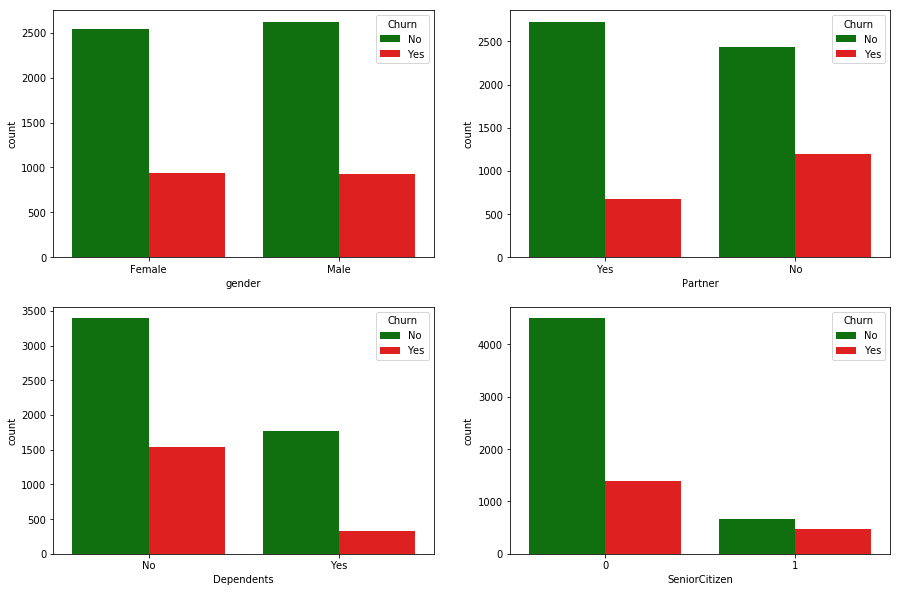

In [0]:
# Demographic Features
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
sns.countplot(x = "gender", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][0])
sns.countplot(x = "Partner", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][1])
sns.countplot(x = "Dependents", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[1][0])
sns.countplot(x = "SeniorCitizen", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[1][1])

plt.show(fig)

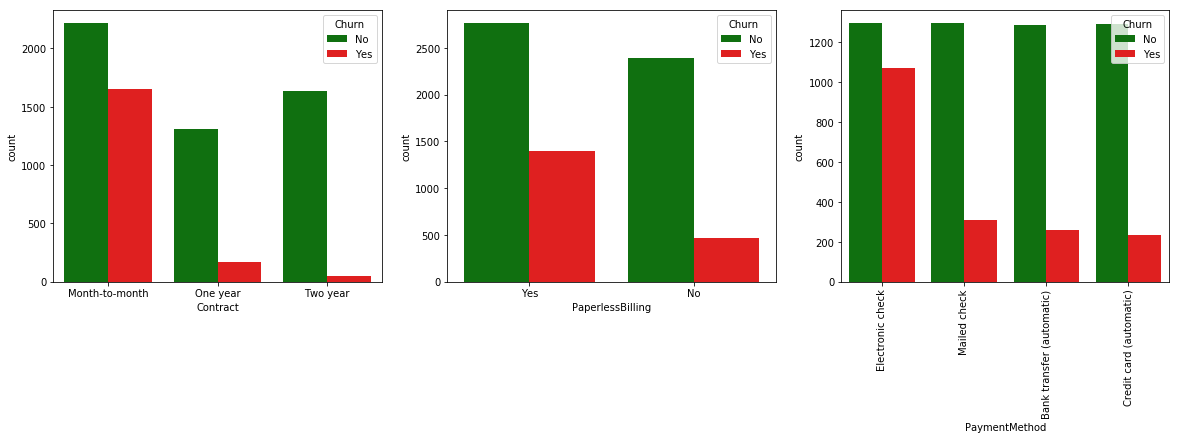

In [0]:
# Account information
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5), squeeze=False)

sns.countplot(x = "Contract", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][0])
sns.countplot(x = "PaperlessBilling", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][1])
ax = sns.countplot(x = "PaymentMethod", hue= "Churn", data=data, palette=["Green","Red"], ax=axes[0][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show(fig)

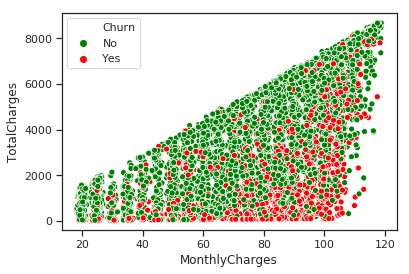

In [0]:
# Monthly Charges & Total Charges by Churn group

scatter_plot=sns.scatterplot(x="MonthlyCharges", y="TotalCharges",
              hue="Churn",
              data=data, palette=["Green","Red"])
fig = scatter_plot.get_figure()
fig.savefig("scatter.png") 
files.download("scatter.png")


In [0]:
#This dataset has 16 categorical features:
#  Six binary features (Yes/No)
#  Nine features with three unique values each (categories)
#  One feature with four unique values

In [0]:
# Let's see the features in columns.
for item in data.columns:
    print(item)
    print (data[item].unique())

In [0]:
# Changing "Yes" "No" features to binary.

data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)


In [0]:
for item in data.columns:
    print(item)
    print (data[item].unique())

NameError: ignored

In [0]:
data.head()

In [0]:
# Changing non categorical features to dummies
data= pd.get_dummies(data)


In [0]:
data.head()

In [0]:
#Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [0]:
# With checking our target data balance, we see that our data is imbalanced data.
#The percentage of customers who churn is only %27. We can either oversample or undersample our data.


print(data["Churn"].value_counts())

ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, colors=["green","red"] )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)




In [0]:
# Libraries we will use for machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [0]:
# Seperation of data for creating a model
X = data.drop('Churn', 1)
y = data['Churn']

In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

In [0]:
# Since our data is under 10000 rows, over sampling is a better choice for us to not loose most of the data. We will make it with SMOTE algorithm.
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 1)

print("Before oversampling, count of '1': {}".format(sum(y_train==1)))
print("Before, count of '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After oversampling, train_X şekli: {}'.format(X_train_res.shape))
print('After oversampling, train_y şekli: {} \n'.format(y_train_res.shape))

print("After oversampling, count of '1': {}".format(sum(y_train_res==1)))
print("After oversampling, count of '0' : {}".format(sum(y_train_res==0)))

In [0]:

# Prediction of churn with machine learning algorithms. 

from sklearn.metrics import classification_report, confusion_matrix

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()]]

predictions_data = pd.DataFrame()
predictions_data['actual_labels'] = y_test

# Before oversampling

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_data[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))

print()
# After oversampling

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_res, y_train_res)
    predictions = classifier.predict(X_test)
    predictions_data[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))